In [2]:
import serial, time
import numpy as np
import matplotlib.pyplot as plt
import joblib
from typing import Union
import os


In [3]:
from typing import Any


class DataTaker:
    def __init__(self, out_folder: str = r"C:\Users\Usuario\Desktop\Cosas U\5to Semestre\Simulación Computacional\Códigos Computación\Datalake\signatures") -> None:
        self.out_folder = out_folder
        self.arduino = serial.Serial('COM6', 115200)
        

    def take_data(self, ):
        datos = []
        rawStringBasura = self.arduino.readline()
        i = 0
        tiempo_inicio = time.time()
        while(True):
            #time.sleep(1e-3)
            try:
                rawString = self.arduino.readline().decode('UTF-8')
                #rawString = rawString.translate( { ord(i): None for i in '\n'} )
                datos.append(int(rawString))
            except Exception as e:
                pass
            if time.time()-tiempo_inicio>3 and np.var(datos[2500:])<1000:
                break
        self.arduino.close()
        
        return np.array(datos)


    def _save_data(self, data: Union[list, np.array], data_name):
        full_path = os.path.join(self.out_folder, data_name)
        full_path = os.path.join(full_path + ".pkl") # I am pickle DATA, LOOK AT MEEEE
        if not os.path.exists(full_path):
            data_dict = {"s1": data}
        else:
            data_dict = joblib.load(full_path)
            num_signatures = len(set(data_dict.keys()))
            d_name = f"s{num_signatures}"
            data_dict[d_name] = data
        joblib.dump(data_dict, full_path)

    def __call__(self, name) -> Any:
        print("RECORDING")
        data = self.take_data()
        self._save_data(data, name)

    def plot(self, name):
        full_path = os.path.join(self.out_folder, name)
        full_path = os.path.join(full_path + ".pkl") # I am pickle DATA, LOOK AT MEEEE
        datas = joblib.load(full_path)
        fig, ax = plt.subplots()
        for index, data in datas.items():
            ax.plot(data - data.mean(), label=index)
        ax.legend()
        plt.show()

In [4]:
e =joblib.load(r"C:\Users\Usuario\Desktop\Cosas U\5to Semestre\Simulación Computacional\Códigos Computación\Datalake\signatures\Jose.pkl")

In [5]:
len(e["s1"])

2501

In [6]:
reader = DataTaker()
reader("Jose")


RECORDING


c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


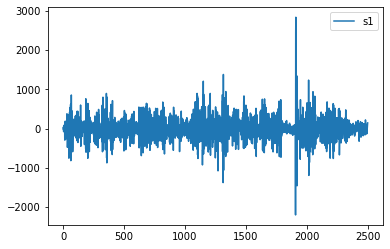

In [7]:
reader.plot("Jose")

In [ ]:
largoTiempo = len(datos)
datosLimpios = []
tiempo = np.arange(0,largoTiempo)
# for i in range(len(datos)):
#     LuisFernandoMoreno = datos[i].decode('UTF-8')
#     LuisFernandoMoreno = LuisFernandoMoreno.translate( { ord(i): None for i in '\n'} )
#     datosLimpios.append(int(LuisFernandoMoreno))
datosLimpiosAhoraSi = np.array(datos).T

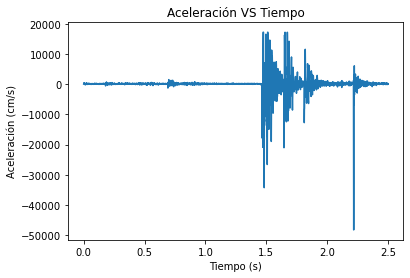

In [ ]:

plt.title("Aceleración VS Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (cm/s)")
plt.plot(tiempo/1000,datosLimpiosAhoraSi-np.mean(datosLimpiosAhoraSi))
#plt.ylim(-50000,50000)
plt.show()

In [ ]:
arduino = serial.Serial('COM6', 115200)
arduino.close()

In [ ]:
len(datos)

3001

In [ ]:
np.var(datos[3000:])

0.0

In [ ]:
datos[3000:]

[15600]

In [ ]:
import serial, time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
arduino.close()
